In [1]:
from get_train_test_for_modeling import *
from get_prediction_data import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score
from format_train_test import *
import pickle
import sklearn.cross_validation as cv
from sklearn.ensemble import (GradientBoostingRegressor, 
                              GradientBoostingClassifier, 
                              AdaBoostClassifier,
                              RandomForestClassifier)
import datetime
plt.style.use('ggplot')


%matplotlib inline

/Users/abdulla/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Making test and train for 24 hr 

In [55]:
# making the training and testing data
filename = 'data_X_y_46059_24hr.csv'
Xy_df = get_Xy_data(filename)

cols_to_keep = ['YY_x', 'MM_x', 'DD_x', 'hh_x', 'WD_x', 'WSPD_x',
                'GST_x', 'WVHT_x', 'DPD_x', 'APD_x', 'BAR_x', 'ATMP_x',
                'WTMP_x', 'DEWP_x', 'ID_x', 't_arrive','WVHT_y']

train_yrs = [1995, 1996, 1997, 1998, 1999, 2000, 2003, 2004, 2006, 2007]
test_yrs  = [2008]

X_train, X_test, y_train, y_test = get_train_test(Xy_df, cols_to_keep, train_yrs, test_yrs)

## Fitting the 24 hr model 

In [61]:
# fitting a gradient booster model
n_estimators = 60000
params = {'n_estimators': n_estimators, 'max_depth': 3, 'min_samples_split': 4,
          'learning_rate': 0.01, 'loss': 'ls' }
gbr_24 = ensemble.GradientBoostingRegressor(**params)
gbr_24.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=4, min_weight_fraction_leaf=0.0,
             n_estimators=60000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [57]:
y_hat_24 = gbr_24.predict(X_test)

In [58]:
mse_train_2 = mean_squared_error(y_train, gbr_24.predict(X_train))
mse_train_2

0.25350210244669369

In [59]:
mse_test_2  = mean_squared_error(y_test, y_hat_24)
mse_test_2  

0.51692596578529493

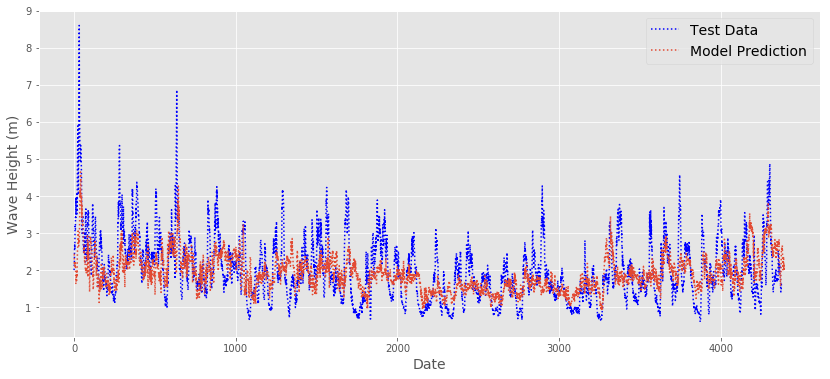

In [60]:
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(y_test[0::2],':', color='b', label = 'Test Data')
ax.plot(y_hat_24[0::2], ':', label = 'Model Prediction')
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Wave Height (m)', fontsize=14)
#ax.set_title('Test Data Comparison with Model Predictions for Source 46005')
plt.legend(prop={'size': 14})

## getting the train and test data for 48 hrs

In [ ]:
# making the training and testing data
filename = 'data_X_y_46059_48hr.csv'
Xy_df = get_Xy_data(filename)

cols_to_keep = ['YY_x', 'MM_x', 'DD_x', 'hh_x', 'WD_x', 'WSPD_x',
                'GST_x', 'WVHT_x', 'DPD_x', 'APD_x', 'BAR_x', 'ATMP_x',
                'WTMP_x', 'DEWP_x', 'ID_x', 't_arrive','BAR_y','WVHT_y']

train_yrs = [1995, 1996, 1997, 1998, 1999, 2000, 2003, 2004, 2006, 2007]
test_yrs  = [2008]

X_train48, X_test48, y_train48, y_test48 = get_train_test(Xy_df, cols_to_keep, train_yrs, test_yrs)

In [ ]:
## fitting the model for 48 hrs

In [ ]:
# fitting a gradient booster model
n_estimators = 6000
params = {'n_estimators': n_estimators, 'max_depth': 3, 'min_samples_split': 4,
          'learning_rate': 0.01, 'loss': 'ls'}
gbr_48 = ensemble.GradientBoostingRegressor(**params)
gbr_48.fit(X_train48, y_train48)

In [42]:
# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(gbr_24.staged_predict(X_test)):
    if i%100 == 0:
        print('Predicting for {}'.format(i))
    test_score[i] = gbr_24.loss_(y_test, y_pred)

Predicting for 0
Predicting for 100
Predicting for 200
Predicting for 300
Predicting for 400
Predicting for 500
Predicting for 600
Predicting for 700
Predicting for 800


KeyboardInterrupt: 

In [62]:
test_score[:]

array([ 0.73330261,  0.73337518,  0.73350632, ...,  0.        ,
        0.        ,  0.        ])

In [2]:
filename = '../data/NDBC_all_data_all_years.csv'
buoyID_train = [46059]
buoyID_test = [46026]

print('Processing the data for training and testing')

Processing the data for training and testing


In [ ]:
# getting the testing and traing data
#data_train_46005 = get_train_bouys(filename, buoyID_train[0])
data_train_46059 = get_train_bouys(filename, buoyID_train[0])
data_labels_46026  = get_train_bouys(filename, buoyID_test[0])

yr_lst = [1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
          2003, 2004, 2006, 2007, 2008]

data_train_46059_hr = join_all_hourly_data(data_train_46059, yr_lst)
data_labels_46026_hr  = join_all_hourly_data(data_labels_46026, yr_lst)

In [4]:
# adding time delta for the data frames
data_train_46059_t = add_time_delta(data_train_46059_t)

In [5]:
# adding time to time_delta
data_train_46059_t = add_time_y(data_train_46059_t)

In [6]:
#rounding time
data_train_46059_t = round_time_y(data_train_46059_t)

In [8]:
predict_hrs = [hr for hr in range(24,166,24)]
for hr in predict_hrs:
    data_train_46059_t['time_delta_{}'.format(str(hr))] = data_train_46059_t['t_arrive'].apply(lambda x: datetime.timedelta((x+hr)/24))
    data_train_46059_t['time_y_{}'.format(str(hr))] = data_train_46059_t.index + data_train_46059_t['time_delta_{}'.format(hr)]
    data_train_46059_t['time_y_hr_{}'.format(hr)]  = data_train_46059_t['time_y_{}'.format(hr)].apply(lambda dt: datetime.datetime(dt.year,
                                                                                             dt.month,
                                                                                             dt.day,
                                                                                             dt.hour,
                                                                                             0,0))

In [28]:
lst_merge = ['time_yr_hr', 'time_yr_hr_24', 'time_yr_hr_48', 'time_yr_hr_72',
             'time_yr_hr_96', 'time_yr_hr_120', 'time_yr_hr_144']

In [29]:
lst_merge[0]

'time_yr_hr'

In [27]:
data_X_y_46059 = pd.merge(data_train_46059_t,
                          data_labels_46026_hr,
                          how='left', left_on=lst_merge[0], right_on='id')

KeyError: 'time_yr_hr'

In [23]:
for item in lst_merge:
    #data_X_y_46005 = pd.merge(data_train_46005_t, data_test_46026, left_on='time_y_hr', right_index=True)
    merged_df = pd.merge(data_train_46059_t,
                         data_labels_46026_hr,
                         how='left', left_on=item, right_on='id')
    merge_df.to_csv('data_X_y_46059_train_{}.csv'.format(item.split('_')[-1]), index=False)

KeyError: 'time_yr_hr'